#Dipprokash sardar(C91/MCA/202001)


In [2]:
#Download the dataset from google drive
!gdown --id 1YZL53n97kTimccgnEZZ1MQp7Csq1KqV3

Downloading...
From: https://drive.google.com/uc?id=1YZL53n97kTimccgnEZZ1MQp7Csq1KqV3
To: /content/archive_2.zip
100% 134M/134M [00:02<00:00, 50.7MB/s]


In [3]:
#Unzip the dataset
!unzip /content/archive_2.zip

Archive:  /content/archive_2.zip
  inflating: Dog and Cat .png/Cat/1.png  
  inflating: Dog and Cat .png/Cat/10.png  
  inflating: Dog and Cat .png/Cat/100.png  
  inflating: Dog and Cat .png/Cat/101.png  
  inflating: Dog and Cat .png/Cat/102.png  
  inflating: Dog and Cat .png/Cat/103.png  
  inflating: Dog and Cat .png/Cat/104.png  
  inflating: Dog and Cat .png/Cat/105.png  
  inflating: Dog and Cat .png/Cat/106.png  
  inflating: Dog and Cat .png/Cat/107.png  
  inflating: Dog and Cat .png/Cat/108.png  
  inflating: Dog and Cat .png/Cat/109.png  
  inflating: Dog and Cat .png/Cat/11.png  
  inflating: Dog and Cat .png/Cat/110.png  
  inflating: Dog and Cat .png/Cat/111.png  
  inflating: Dog and Cat .png/Cat/112.png  
  inflating: Dog and Cat .png/Cat/113.png  
  inflating: Dog and Cat .png/Cat/114.png  
  inflating: Dog and Cat .png/Cat/115.png  
  inflating: Dog and Cat .png/Cat/116.png  
  inflating: Dog and Cat .png/Cat/117.png  
  inflating: Dog and Cat .png/Cat/118.png  
  i

#Import lib

In [4]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [5]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

Using TensorFlow backend.


In [6]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

553467904/553467096 [==============================] - 24s 0us/step


#Image preprocess

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

#Import an Image from dataset

shape of x:  (1, 224, 224, 3)
data type:  float32


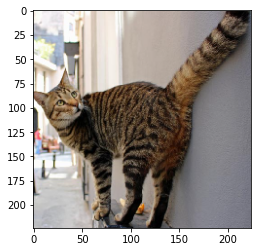

In [8]:
img, x = load_image("/content/Dog and Cat .png/Cat/1.png")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [9]:
# forward the image through the network
predictions = model.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))


40960/35363 [==================================] - 0s 0us/step
predicted tiger_cat with probability 0.358
predicted Egyptian_cat with probability 0.343
predicted tabby with probability 0.270
predicted lynx with probability 0.011
predicted tiger with probability 0.003


In [10]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
#feat_extractor.summary()

In [11]:
images_path = '/content/Dog and Cat .png/Cat'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 500 images to analyze


In [12]:
import time
tic = time.clock()


features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


analyzing image 0 / 500. Time: 0.0006 seconds.
finished extracting features for 500 images


In [ ]:
images_path = '/content/Dog and Cat .png/Cat'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 500 images to analyze


In [13]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)

PCA(n_components=300)

In [16]:
pca_features = pca.transform(features)

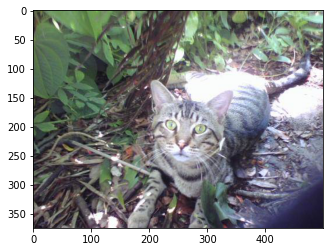

In [14]:
import random

# grab a random query image
query_image_idx = int(len(images) * random.random())

# let's display the image
img = image.load_img(images[query_image_idx])
plt.imshow(img)

In [17]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]

In [18]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

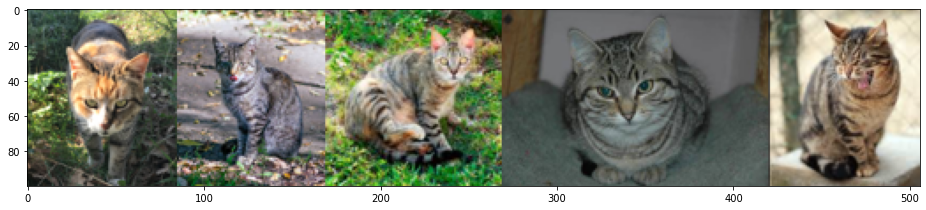

In [19]:
# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)
